In [1]:
#Installing required packages

#!pip install WordNet
#!pip install torch
#!pip install spacy
#!pip install -U spacy 
#pip install transformers
#!python -m spacy download en_core_web_sm

#importing required libraries

import pandas as pd
import numpy as np 
import nltk
import re
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns


#  Preprocesssing textual data

from nltk import word_tokenize, pos_tag
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
pd.set_option('display.max_colwidth', 1000)

# additional nltk resources

nltk.download('stopwords')
nltk.download('lemmatizer')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

# Feature Extraction

from sklearn.feature_extraction.text import TfidfVectorizer


# Check Performance
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading lemmatizer: Package 'lemmatizer' not found
[nltk_data]     in index
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\U

In [2]:
# Importing required data AND Overview
data = pd.read_csv(r"C:\Users\sukan\ipba\csv\comments_for_video_Kv181qM4AUM.csv")
data.head(25)

,Comment Number,Reply Number,Like Count,Published At,Text
0,1.0,NaN,0,2023-02-19T06:39:00Z,"God bless you, Tucker! ❤"
1,2.0,NaN,0,2023-02-19T06:35:14Z,"But whoso shall offend one of these little ones which believe in me, it were better for him that a millstone were hanged about his neck, and that he were drowned in the depth of the sea.\n~ Matthew 18:6 KJV"
2,3.0,NaN,0,2023-02-14T02:31:22Z,This is absolutely unbelievable. Thank you Tucker for standing up to this evil.
3,4.0,NaN,0,2023-02-13T23:45:57Z,Thank you for covering this Tucker Carlson the elites know the devil and Jesus are real that show what side there on and sadly it filters through to our society where people blindly live and deny God it’s disgusting and gives me that kick in the bum that I need to stop this backsliden state I’m in and come back for Christ just as hard as before
4,5.0,NaN,0,2023-01-29T23:26:37Z,"Looks like Corona also affected the brains of quite a few people in the US. Evil against innocent children, in any form is the worst possible sin and must never go unpunished."
5,6.0,NaN,0,2023-01-28T14:59:21Z,"Just research SRA (satanic ritual abuse), more and more survivors coming forward, rituals performed by elites."
6,7.0,NaN,0,2023-01-25T18:57:36Z,The demons are feeling BOLD and don't even try to hide it......thinking we won't push back.
7,8.0,NaN,0,2023-01-23T12:30:25Z,Isn't lying and spread misinformation crime??? I think it is ....moral crime!!
8,9.0,NaN,0,2023-01-23T09:49:22Z,Where are this precious little girls PARENTS?? And is she being already trafficked?!😮 She needs to be helped.
9,10.0,NaN,1,2023-01-18T00:06:22Z,I want off this rock 🌎..I don't belong here.


In [3]:
# Changing name of 'text' column to 'Comments' column
data.rename(columns = {'Text':'Comments'}, inplace = True)
# removing columns

data = data.drop(['Like Count','Reply Number','Comment Number','Published At'], axis=1)
data = data[['Comments']][:1500]

In [4]:
data['Comments'] =data['Comments'].astype(str)

In [5]:
data.head()

,Comments
0,"God bless you, Tucker! ❤"
1,"But whoso shall offend one of these little ones which believe in me, it were better for him that a millstone were hanged about his neck, and that he were drowned in the depth of the sea.\n~ Matthew 18:6 KJV"
2,This is absolutely unbelievable. Thank you Tucker for standing up to this evil.
3,Thank you for covering this Tucker Carlson the elites know the devil and Jesus are real that show what side there on and sadly it filters through to our society where people blindly live and deny God it’s disgusting and gives me that kick in the bum that I need to stop this backsliden state I’m in and come back for Christ just as hard as before
4,"Looks like Corona also affected the brains of quite a few people in the US. Evil against innocent children, in any form is the worst possible sin and must never go unpunished."


In [6]:
data.dtypes

Comments    object
dtype: object

In [7]:
data.shape

(1500, 1)

In [8]:
#### EDA- cleaning

In [9]:
# URLs removal and extra spaces too

data['Comments'] = data['Comments'].apply(lambda x: re.sub(r'https?\S+ðŸ˜žðŸ˜­ðŸ¤¬', '', x).strip())

In [10]:
##Remove punctuation

import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [11]:
# Commit to Table
data['Comments'] = data['Comments'].apply(remove_punctuations)

In [12]:
# Convert to lower 
data['Comments']=data['Comments'].apply(lambda x: x.lower())

In [13]:
# Get Stopwords
stop = stopwords.words('english')

In [14]:
# Tokenize and Remove Stop Words
data['Comments'].apply(lambda x: [word for word in x.split() if word not in stop])

0                                                                                                                                                                                                                             [god, bless, tucker, ❤]
1                                                                                                                         [whoso, shall, offend, one, little, ones, believe, better, millstone, hanged, neck, drowned, depth, sea, matthew, 186, kjv]
2                                                                                                                                                                                           [absolutely, unbelievable, thank, tucker, standing, evil]
3       [thank, covering, tucker, carlson, elites, know, devil, jesus, real, show, side, sadly, filters, society, people, blindly, live, deny, god, it’s, disgusting, gives, kick, bum, need, stop, backsliden, state, i’m, come, back, christ, hard]
4               

In [15]:
# Join the words back
data['Comments'] = data['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [16]:
from nltk.stem import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()

In [17]:
# Commit to Table

data['Comments'] = data['Comments'].apply(lambda x: lemmatizer.lemmatize(x))

In [18]:
# Instantiate the TweetTokenizer
tokenizer = TweetTokenizer()

# Define a function to tokenize a tweet
def tokenize_tweet(tweet):
    # Use the TweetTokenizer to tokenize the tweet
    tokens = tokenizer.tokenize(tweet)
    return tokens

# Apply the tokenization function to the 'Comments' column
data['Tokens'] = data['Comments'].apply(tokenize_tweet)

In [19]:
def pos_tagging(text):
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    # Perform POS tagging
    tagged_tokens = nltk.pos_tag(tokens)
    # Return the tagged tokens
    return tagged_tokens

In [20]:
# Applying the POS tagging function to the 'Comments' column
data['POS_Tagged'] = data['Comments'].apply(pos_tagging)

In [21]:
data.head()

,Comments,Tokens,POS_Tagged
0,god bless tucker ❤,"[god, bless, tucker, ❤]","[(god, NN), (bless, NN), (tucker, NN), (❤, NN)]"
1,whoso shall offend one little ones believe better millstone hanged neck drowned depth sea matthew 186 kjv,"[whoso, shall, offend, one, little, ones, believe, better, millstone, hanged, neck, drowned, depth, sea, matthew, 186, kjv]","[(whoso, NN), (shall, MD), (offend, VB), (one, CD), (little, JJ), (ones, NNS), (believe, VBP), (better, JJR), (millstone, NN), (hanged, VBD), (neck, NN), (drowned, VBD), (depth, JJ), (sea, NN), (matthew, VBD), (186, CD), (kjv, NN)]"
2,absolutely unbelievable thank tucker standing evil,"[absolutely, unbelievable, thank, tucker, standing, evil]","[(absolutely, RB), (unbelievable, JJ), (thank, NN), (tucker, NN), (standing, VBG), (evil, NN)]"
3,thank covering tucker carlson elites know devil jesus real show side sadly filters society people blindly live deny god it’s disgusting gives kick bum need stop backsliden state i’m come back christ hard,"[thank, covering, tucker, carlson, elites, know, devil, jesus, real, show, side, sadly, filters, society, people, blindly, live, deny, god, it, ’, s, disgusting, gives, kick, bum, need, stop, backsliden, state, i, ’, m, come, back, christ, hard]","[(thank, NN), (covering, VBG), (tucker, NN), (carlson, NN), (elites, NNS), (know, VBP), (devil, RB), (jesus, JJ), (real, JJ), (show, NN), (side, NN), (sadly, RB), (filters, VBZ), (society, NN), (people, NNS), (blindly, RB), (live, VBP), (deny, NN), (god, NN), (it, PRP), (’, VBZ), (s, JJ), (disgusting, VBG), (gives, VBZ), (kick, NN), (bum, NN), (need, VBP), (stop, VB), (backsliden, NN), (state, NN), (i, NN), (’, VBP), (m, NN), (come, VBN), (back, RB), (christ, JJ), (hard, NN)]"
4,looks like corona also affected brains quite people us evil innocent children form worst possible sin must never go unpunished,"[looks, like, corona, also, affected, brains, quite, people, us, evil, innocent, children, form, worst, possible, sin, must, never, go, unpunished]","[(looks, NNS), (like, IN), (corona, NN), (also, RB), (affected, VBD), (brains, NNS), (quite, RB), (people, NNS), (us, PRP), (evil, VBP), (innocent, JJ), (children, NNS), (form, VBP), (worst, JJS), (possible, JJ), (sin, NN), (must, MD), (never, RB), (go, VB), (unpunished, JJ)]"


In [22]:
####Creating models and using it on the dataset

In [23]:
###Analysing sentiments through vader

In [24]:
# Load SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Generate sentiment scores
sentiment_scores = data['Comments'].apply(sid.polarity_scores)

In [25]:
data["vader_score"] = sentiment_scores.apply(lambda x: x['compound'])

In [26]:
data.head()

,Comments,Tokens,POS_Tagged,vader_score
0,god bless tucker ❤,"[god, bless, tucker, ❤]","[(god, NN), (bless, NN), (tucker, NN), (❤, NN)]",0.5994
1,whoso shall offend one little ones believe better millstone hanged neck drowned depth sea matthew 186 kjv,"[whoso, shall, offend, one, little, ones, believe, better, millstone, hanged, neck, drowned, depth, sea, matthew, 186, kjv]","[(whoso, NN), (shall, MD), (offend, VB), (one, CD), (little, JJ), (ones, NNS), (believe, VBP), (better, JJR), (millstone, NN), (hanged, VBD), (neck, NN), (drowned, VBD), (depth, JJ), (sea, NN), (matthew, VBD), (186, CD), (kjv, NN)]",-0.5367
2,absolutely unbelievable thank tucker standing evil,"[absolutely, unbelievable, thank, tucker, standing, evil]","[(absolutely, RB), (unbelievable, JJ), (thank, NN), (tucker, NN), (standing, VBG), (evil, NN)]",-0.1352
3,thank covering tucker carlson elites know devil jesus real show side sadly filters society people blindly live deny god it’s disgusting gives kick bum need stop backsliden state i’m come back christ hard,"[thank, covering, tucker, carlson, elites, know, devil, jesus, real, show, side, sadly, filters, society, people, blindly, live, deny, god, it, ’, s, disgusting, gives, kick, bum, need, stop, backsliden, state, i, ’, m, come, back, christ, hard]","[(thank, NN), (covering, VBG), (tucker, NN), (carlson, NN), (elites, NNS), (know, VBP), (devil, RB), (jesus, JJ), (real, JJ), (show, NN), (side, NN), (sadly, RB), (filters, VBZ), (society, NN), (people, NNS), (blindly, RB), (live, VBP), (deny, NN), (god, NN), (it, PRP), (’, VBZ), (s, JJ), (disgusting, VBG), (gives, VBZ), (kick, NN), (bum, NN), (need, VBP), (stop, VB), (backsliden, NN), (state, NN), (i, NN), (’, VBP), (m, NN), (come, VBN), (back, RB), (christ, JJ), (hard, NN)]",-0.9001
4,looks like corona also affected brains quite people us evil innocent children form worst possible sin must never go unpunished,"[looks, like, corona, also, affected, brains, quite, people, us, evil, innocent, children, form, worst, possible, sin, must, never, go, unpunished]","[(looks, NNS), (like, IN), (corona, NN), (also, RB), (affected, VBD), (brains, NNS), (quite, RB), (people, NNS), (us, PRP), (evil, VBP), (innocent, JJ), (children, NNS), (form, VBP), (worst, JJS), (possible, JJ), (sin, NN), (must, MD), (never, RB), (go, VB), (unpunished, JJ)]",-0.8768


In [27]:
count_total=0
count_pos=0
count_neg=0
#count_neut=0


for i in data["vader_score"]:
    if i >=0:
        count_pos=count_pos+1
    elif i <0:
        count_neg = count_neg +1
    else:
        0
        #count_neut = count_neut +1
        
 

print("positive tweets:",count_pos)
print("negative tweets:",count_neg)

conditions = [
    (data['vader_score'] >=0),
    (data['vader_score'] <0)]
    
choices = [1,0]
data['vader_sentiment'] = np.select(conditions, choices )

positive tweets: 803
negative tweets: 697


In [28]:
data.head()

,Comments,Tokens,POS_Tagged,vader_score,vader_sentiment
0,god bless tucker ❤,"[god, bless, tucker, ❤]","[(god, NN), (bless, NN), (tucker, NN), (❤, NN)]",0.5994,1
1,whoso shall offend one little ones believe better millstone hanged neck drowned depth sea matthew 186 kjv,"[whoso, shall, offend, one, little, ones, believe, better, millstone, hanged, neck, drowned, depth, sea, matthew, 186, kjv]","[(whoso, NN), (shall, MD), (offend, VB), (one, CD), (little, JJ), (ones, NNS), (believe, VBP), (better, JJR), (millstone, NN), (hanged, VBD), (neck, NN), (drowned, VBD), (depth, JJ), (sea, NN), (matthew, VBD), (186, CD), (kjv, NN)]",-0.5367,0
2,absolutely unbelievable thank tucker standing evil,"[absolutely, unbelievable, thank, tucker, standing, evil]","[(absolutely, RB), (unbelievable, JJ), (thank, NN), (tucker, NN), (standing, VBG), (evil, NN)]",-0.1352,0
3,thank covering tucker carlson elites know devil jesus real show side sadly filters society people blindly live deny god it’s disgusting gives kick bum need stop backsliden state i’m come back christ hard,"[thank, covering, tucker, carlson, elites, know, devil, jesus, real, show, side, sadly, filters, society, people, blindly, live, deny, god, it, ’, s, disgusting, gives, kick, bum, need, stop, backsliden, state, i, ’, m, come, back, christ, hard]","[(thank, NN), (covering, VBG), (tucker, NN), (carlson, NN), (elites, NNS), (know, VBP), (devil, RB), (jesus, JJ), (real, JJ), (show, NN), (side, NN), (sadly, RB), (filters, VBZ), (society, NN), (people, NNS), (blindly, RB), (live, VBP), (deny, NN), (god, NN), (it, PRP), (’, VBZ), (s, JJ), (disgusting, VBG), (gives, VBZ), (kick, NN), (bum, NN), (need, VBP), (stop, VB), (backsliden, NN), (state, NN), (i, NN), (’, VBP), (m, NN), (come, VBN), (back, RB), (christ, JJ), (hard, NN)]",-0.9001,0
4,looks like corona also affected brains quite people us evil innocent children form worst possible sin must never go unpunished,"[looks, like, corona, also, affected, brains, quite, people, us, evil, innocent, children, form, worst, possible, sin, must, never, go, unpunished]","[(looks, NNS), (like, IN), (corona, NN), (also, RB), (affected, VBD), (brains, NNS), (quite, RB), (people, NNS), (us, PRP), (evil, VBP), (innocent, JJ), (children, NNS), (form, VBP), (worst, JJS), (possible, JJ), (sin, NN), (must, MD), (never, RB), (go, VB), (unpunished, JJ)]",-0.8768,0


In [29]:
for i in data['vader_sentiment']:
    if i == 1:
        lable= ("Positive")
    elif i ==0:
        lable= ("Negative")
    else:
        0

        
(data['vader_sentiment'] ==1),
(data['vader_sentiment'] ==0),

choices = ["Positive","Negative"]

data['vader_labels'] = np.select(conditions, choices )

In [30]:
data.head()

,Comments,Tokens,POS_Tagged,vader_score,vader_sentiment,vader_labels
0,god bless tucker ❤,"[god, bless, tucker, ❤]","[(god, NN), (bless, NN), (tucker, NN), (❤, NN)]",0.5994,1,Positive
1,whoso shall offend one little ones believe better millstone hanged neck drowned depth sea matthew 186 kjv,"[whoso, shall, offend, one, little, ones, believe, better, millstone, hanged, neck, drowned, depth, sea, matthew, 186, kjv]","[(whoso, NN), (shall, MD), (offend, VB), (one, CD), (little, JJ), (ones, NNS), (believe, VBP), (better, JJR), (millstone, NN), (hanged, VBD), (neck, NN), (drowned, VBD), (depth, JJ), (sea, NN), (matthew, VBD), (186, CD), (kjv, NN)]",-0.5367,0,Negative
2,absolutely unbelievable thank tucker standing evil,"[absolutely, unbelievable, thank, tucker, standing, evil]","[(absolutely, RB), (unbelievable, JJ), (thank, NN), (tucker, NN), (standing, VBG), (evil, NN)]",-0.1352,0,Negative
3,thank covering tucker carlson elites know devil jesus real show side sadly filters society people blindly live deny god it’s disgusting gives kick bum need stop backsliden state i’m come back christ hard,"[thank, covering, tucker, carlson, elites, know, devil, jesus, real, show, side, sadly, filters, society, people, blindly, live, deny, god, it, ’, s, disgusting, gives, kick, bum, need, stop, backsliden, state, i, ’, m, come, back, christ, hard]","[(thank, NN), (covering, VBG), (tucker, NN), (carlson, NN), (elites, NNS), (know, VBP), (devil, RB), (jesus, JJ), (real, JJ), (show, NN), (side, NN), (sadly, RB), (filters, VBZ), (society, NN), (people, NNS), (blindly, RB), (live, VBP), (deny, NN), (god, NN), (it, PRP), (’, VBZ), (s, JJ), (disgusting, VBG), (gives, VBZ), (kick, NN), (bum, NN), (need, VBP), (stop, VB), (backsliden, NN), (state, NN), (i, NN), (’, VBP), (m, NN), (come, VBN), (back, RB), (christ, JJ), (hard, NN)]",-0.9001,0,Negative
4,looks like corona also affected brains quite people us evil innocent children form worst possible sin must never go unpunished,"[looks, like, corona, also, affected, brains, quite, people, us, evil, innocent, children, form, worst, possible, sin, must, never, go, unpunished]","[(looks, NNS), (like, IN), (corona, NN), (also, RB), (affected, VBD), (brains, NNS), (quite, RB), (people, NNS), (us, PRP), (evil, VBP), (innocent, JJ), (children, NNS), (form, VBP), (worst, JJS), (possible, JJ), (sin, NN), (must, MD), (never, RB), (go, VB), (unpunished, JJ)]",-0.8768,0,Negative


<AxesSubplot:xlabel='vader_labels', ylabel='count'>

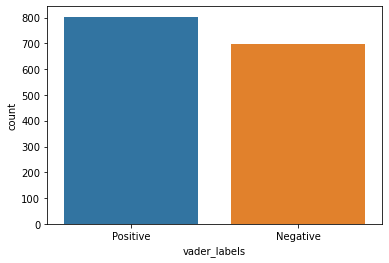

In [31]:
import seaborn as sns

sns.countplot(x='vader_labels', data=data)

Positive Sentiments


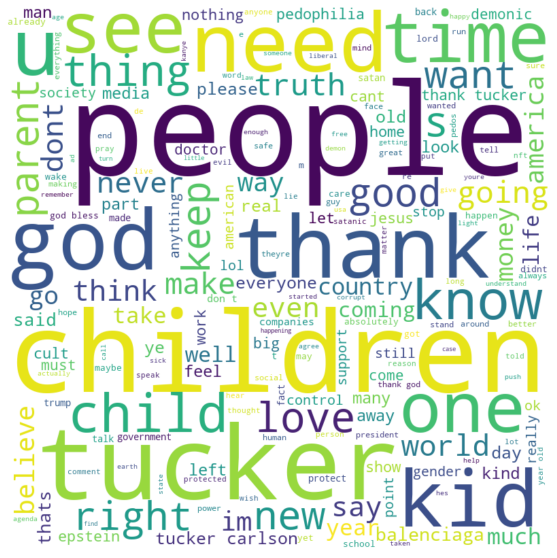

Negative Sentiments


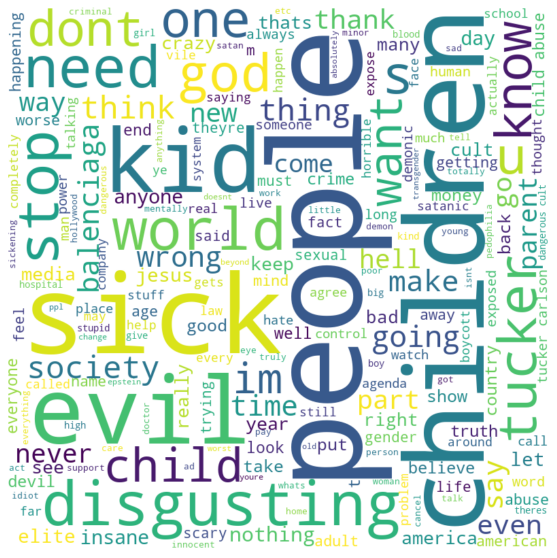

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

positive_tweets = ' '.join(data[data['vader_labels'] == 'Positive']['Comments'].tolist())

negative_tweets = ' '.join(data[data['vader_labels'] == 'Negative']['Comments'].tolist())

print("Positive Sentiments")
generate_wordcloud(positive_tweets)
print("Negative Sentiments")
generate_wordcloud(negative_tweets)

In [33]:
###Analysing sentiments through pretrained roBERTa

In [34]:
## Importing model
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [35]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [36]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
# List of samples
samples = data['Comments'].tolist()

# List to store the scores for each sample
scores_list = []

# Calculate the scores for each sample and store in the scores_list
for sample in samples:
    encoded_text = tokenizer(sample, padding=True, truncation=True, max_length=128, return_tensors='pt')
    input_ids = encoded_text['input_ids']
    attention_mask = encoded_text['attention_mask']
    output = model(input_ids=input_ids, attention_mask=attention_mask)
    scores = torch.softmax(output.logits, dim=1)
    scores_dict = {
        'roberta_neg' : scores[0][0].item(),  
        'roberta_pos' : scores[0][1].item()
    }
    scores_list.append(scores_dict)

# Create a pandas dataframe from the scores_list
scores_df = pd.DataFrame(scores_list)

# Concatenate the original data and scores_df dataframes horizontally
data = pd.concat([data, scores_df], axis=1)

# Print the updated dataframe
print(data)

                                                                                                                                                                                                         Comments  \
0                                                                                                                                                                                              god bless tucker ❤   
1                                                                                                       whoso shall offend one little ones believe better millstone hanged neck drowned depth sea matthew 186 kjv   
2                                                                                                                                                              absolutely unbelievable thank tucker standing evil   
3     thank covering tucker carlson elites know devil jesus real show side sadly filters society people blindly live deny god it’s disgusting gives 

In [37]:
data.head(15)

,Comments,Tokens,POS_Tagged,vader_score,vader_sentiment,vader_labels,roberta_neg,roberta_pos
0,god bless tucker ❤,"[god, bless, tucker, ❤]","[(god, NN), (bless, NN), (tucker, NN), (❤, NN)]",0.5994,1,Positive,0.003408,0.057810
1,whoso shall offend one little ones believe better millstone hanged neck drowned depth sea matthew 186 kjv,"[whoso, shall, offend, one, little, ones, believe, better, millstone, hanged, neck, drowned, depth, sea, matthew, 186, kjv]","[(whoso, NN), (shall, MD), (offend, VB), (one, CD), (little, JJ), (ones, NNS), (believe, VBP), (better, JJR), (millstone, NN), (hanged, VBD), (neck, NN), (drowned, VBD), (depth, JJ), (sea, NN), (matthew, VBD), (186, CD), (kjv, NN)]",-0.5367,0,Negative,0.444081,0.539240
2,absolutely unbelievable thank tucker standing evil,"[absolutely, unbelievable, thank, tucker, standing, evil]","[(absolutely, RB), (unbelievable, JJ), (thank, NN), (tucker, NN), (standing, VBG), (evil, NN)]",-0.1352,0,Negative,0.939080,0.055581
3,thank covering tucker carlson elites know devil jesus real show side sadly filters society people blindly live deny god it’s disgusting gives kick bum need stop backsliden state i’m come back christ hard,"[thank, covering, tucker, carlson, elites, know, devil, jesus, real, show, side, sadly, filters, society, people, blindly, live, deny, god, it, ’, s, disgusting, gives, kick, bum, need, stop, backsliden, state, i, ’, m, come, back, christ, hard]","[(thank, NN), (covering, VBG), (tucker, NN), (carlson, NN), (elites, NNS), (know, VBP), (devil, RB), (jesus, JJ), (real, JJ), (show, NN), (side, NN), (sadly, RB), (filters, VBZ), (society, NN), (people, NNS), (blindly, RB), (live, VBP), (deny, NN), (god, NN), (it, PRP), (’, VBZ), (s, JJ), (disgusting, VBG), (gives, VBZ), (kick, NN), (bum, NN), (need, VBP), (stop, VB), (backsliden, NN), (state, NN), (i, NN), (’, VBP), (m, NN), (come, VBN), (back, RB), (christ, JJ), (hard, NN)]",-0.9001,0,Negative,0.851025,0.137838
4,looks like corona also affected brains quite people us evil innocent children form worst possible sin must never go unpunished,"[looks, like, corona, also, affected, brains, quite, people, us, evil, innocent, children, form, worst, possible, sin, must, never, go, unpunished]","[(looks, NNS), (like, IN), (corona, NN), (also, RB), (affected, VBD), (brains, NNS), (quite, RB), (people, NNS), (us, PRP), (evil, VBP), (innocent, JJ), (children, NNS), (form, VBP), (worst, JJS), (possible, JJ), (sin, NN), (must, MD), (never, RB), (go, VB), (unpunished, JJ)]",-0.8768,0,Negative,0.962441,0.035262
5,research sra satanic ritual abuse survivors coming forward rituals performed elites,"[research, sra, satanic, ritual, abuse, survivors, coming, forward, rituals, performed, elites]","[(research, NN), (sra, NN), (satanic, JJ), (ritual, JJ), (abuse, NN), (survivors, NNS), (coming, VBG), (forward, RB), (rituals, NNS), (performed, VBD), (elites, NNS)]",-0.6369,0,Negative,0.462200,0.528730
6,demons feeling bold dont even try hide itthinking wont push back,"[demons, feeling, bold, dont, even, try, hide, itthinking, wont, push, back]","[(demons, NNS), (feeling, VBG), (bold, JJ), (dont, NN), (even, RB), (try, VB), (hide, NN), (itthinking, VBG), (wont, JJ), (push, NN), (back, RB)]",0.5600,1,Positive,0.251015,0.664756
7,isnt lying spread misinformation crime think moral crime,"[isnt, lying, spread, misinformation, crime, think, moral, crime]","[(isnt, NN), (lying, VBG), (spread, JJ), (misinformation, NN), (crime, NN), (think, VBP), (moral, JJ), (crime, NN)]",-0.5043,0,Negative,0.753683,0.237621
8,precious little girls parents already trafficked😮 needs helped,"[precious, little, girls, parents, already, trafficked, 😮, needs, helped]","[(precious, JJ), (little, JJ), (girls, JJ), (parents, NNS), (already, RB), (trafficked😮, VBP), (needs, NNS), (helped, VBD)]",0.5719,1,Positive,0.748504,0.227768
9,want rock 🌎i dont belong,"[want, rock, 🌎, i, dont, belong]","[(want, NN), (rock, NN), (🌎i, NNP), (dont, NN), (belong, NN)]",0.0772,1,Positive,0.50

In [38]:
def get_label(score):
    if score > 0.5:
        return "Positive"
    else:
        return "Negative"

# Convert the scores to labels for each model
data["roberta_labels"] = data["roberta_pos"].apply(get_label)

In [39]:
data.head(5)

,Comments,Tokens,POS_Tagged,vader_score,vader_sentiment,vader_labels,roberta_neg,roberta_pos,roberta_labels
0,god bless tucker ❤,"[god, bless, tucker, ❤]","[(god, NN), (bless, NN), (tucker, NN), (❤, NN)]",0.5994,1,Positive,0.003408,0.057810,Negative
1,whoso shall offend one little ones believe better millstone hanged neck drowned depth sea matthew 186 kjv,"[whoso, shall, offend, one, little, ones, believe, better, millstone, hanged, neck, drowned, depth, sea, matthew, 186, kjv]","[(whoso, NN), (shall, MD), (offend, VB), (one, CD), (little, JJ), (ones, NNS), (believe, VBP), (better, JJR), (millstone, NN), (hanged, VBD), (neck, NN), (drowned, VBD), (depth, JJ), (sea, NN), (matthew, VBD), (186, CD), (kjv, NN)]",-0.5367,0,Negative,0.444081,0.539240,Positive
2,absolutely unbelievable thank tucker standing evil,"[absolutely, unbelievable, thank, tucker, standing, evil]","[(absolutely, RB), (unbelievable, JJ), (thank, NN), (tucker, NN), (standing, VBG), (evil, NN)]",-0.1352,0,Negative,0.939080,0.055581,Negative
3,thank covering tucker carlson elites know devil jesus real show side sadly filters society people blindly live deny god it’s disgusting gives kick bum need stop backsliden state i’m come back christ hard,"[thank, covering, tucker, carlson, elites, know, devil, jesus, real, show, side, sadly, filters, society, people, blindly, live, deny, god, it, ’, s, disgusting, gives, kick, bum, need, stop, backsliden, state, i, ’, m, come, back, christ, hard]","[(thank, NN), (covering, VBG), (tucker, NN), (carlson, NN), (elites, NNS), (know, VBP), (devil, RB), (jesus, JJ), (real, JJ), (show, NN), (side, NN), (sadly, RB), (filters, VBZ), (society, NN), (people, NNS), (blindly, RB), (live, VBP), (deny, NN), (god, NN), (it, PRP), (’, VBZ), (s, JJ), (disgusting, VBG), (gives, VBZ), (kick, NN), (bum, NN), (need, VBP), (stop, VB), (backsliden, NN), (state, NN), (i, NN), (’, VBP), (m, NN), (come, VBN), (back, RB), (christ, JJ), (hard, NN)]",-0.9001,0,Negative,0.851025,0.137838,Negative
4,looks like corona also affected brains quite people us evil innocent children form worst possible sin must never go unpunished,"[looks, like, corona, also, affected, brains, quite, people, us, evil, innocent, children, form, worst, possible, sin, must, never, go, unpunished]","[(looks, NNS), (like, IN), (corona, NN), (also, RB), (affected, VBD), (brains, NNS), (quite, RB), (people, NNS), (us, PRP), (evil, VBP), (innocent, JJ), (children, NNS), (form, VBP), (worst, JJS), (possible, JJ), (sin, NN), (must, MD), (never, RB), (go, VB), (unpunished, JJ)]",-0.8768,0,Negative,0.962441,0.035262,Negative


<AxesSubplot:xlabel='roberta_labels', ylabel='count'>

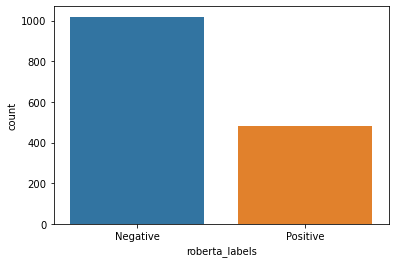

In [40]:
import seaborn as sns

sns.countplot(x='roberta_labels', data=data)

Positive Sentiments


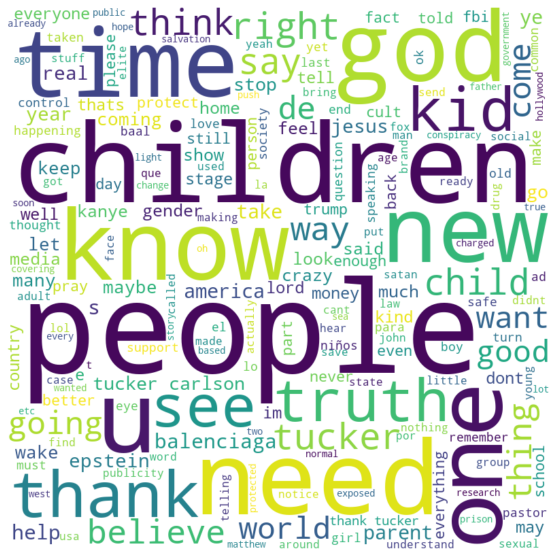

Negative Sentiments


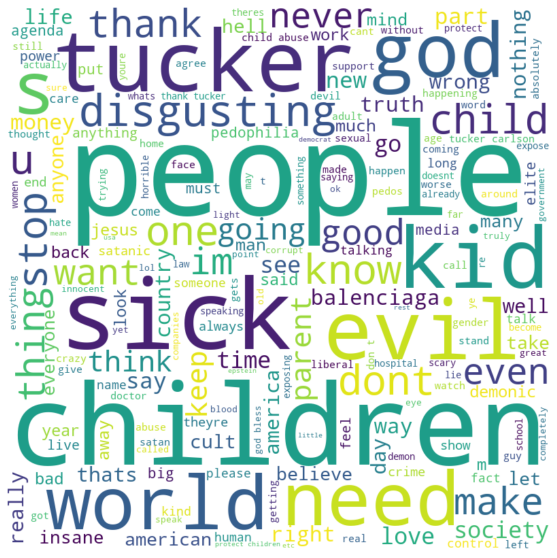

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

positive_tweets = ' '.join(data[data['roberta_labels'] == 'Positive']['Comments'].tolist())

negative_tweets = ' '.join(data[data['roberta_labels'] == 'Negative']['Comments'].tolist())

print("Positive Sentiments")
generate_wordcloud(positive_tweets)
print("Negative Sentiments")
generate_wordcloud(negative_tweets)

In [42]:
### Analysing sentiments through huggingface transformers

In [43]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [44]:
import spacy
import pandas as pd

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('sentencizer')

#Export sample comments from all the datasets
text = data['Comments'].tolist()[:100]
sentences = []
for doc in nlp.pipe(text):
    sentences.extend([sent.text for sent in doc.sents])

print(sentences)

['god bless tucker ❤', 'whoso shall offend one little ones believe better millstone hanged neck drowned depth sea matthew 186 kjv', 'absolutely unbelievable thank tucker standing evil', 'thank covering tucker carlson elites know devil jesus real show side sadly filters society people blindly live deny god', 'it’s disgusting gives kick bum need stop backsliden state', 'i’m come back christ hard', 'looks like corona also affected brains quite people us evil innocent children form worst possible sin must never go unpunished', 'research sra satanic ritual abuse survivors coming forward rituals performed elites', 'demons feeling bold dont even try hide itthinking wont push back', 'isnt lying spread misinformation crime think moral crime', 'precious little girls parents already trafficked😮 needs helped', 'want rock 🌎i dont belong', 'hello tucker', 'horrific', 'america sodom gomorrah thats push lgbtq accept lgbtq sooner hope accept pedophilia normal', 'mind blown bad cant anything horrible th

In [45]:
sent_pipeline(data['Comments'].tolist()[:100])

[{'label': 'POSITIVE', 'score': 0.9993440508842468},
 {'label': 'NEGATIVE', 'score': 0.99471515417099},
 {'label': 'POSITIVE', 'score': 0.9940502047538757},
 {'label': 'NEGATIVE', 'score': 0.9929913282394409},
 {'label': 'NEGATIVE', 'score': 0.9899054169654846},
 {'label': 'NEGATIVE', 'score': 0.9716704487800598},
 {'label': 'NEGATIVE', 'score': 0.9757592082023621},
 {'label': 'NEGATIVE', 'score': 0.8492477536201477},
 {'label': 'NEGATIVE', 'score': 0.9746306538581848},
 {'label': 'NEGATIVE', 'score': 0.9957679510116577},
 {'label': 'POSITIVE', 'score': 0.9981915354728699},
 {'label': 'NEGATIVE', 'score': 0.9996534585952759},
 {'label': 'NEGATIVE', 'score': 0.9239258170127869},
 {'label': 'NEGATIVE', 'score': 0.9966769218444824},
 {'label': 'NEGATIVE', 'score': 0.9925265312194824},
 {'label': 'POSITIVE', 'score': 0.9938797950744629},
 {'label': 'NEGATIVE', 'score': 0.9948115348815918},
 {'label': 'NEGATIVE', 'score': 0.9741011261940002},
 {'label': 'NEGATIVE', 'score': 0.98558133840560

In [46]:
sentiments = sent_pipeline(data['Comments'].tolist())
data['transformer_score'] = [s['score'] for s in sentiments]
data['transformer_labels'] = [s['label'] for s in sentiments]

In [47]:
data['transformer_labels']=data['transformer_labels'].str.title()

In [48]:
data.head(15)

,Comments,Tokens,POS_Tagged,vader_score,vader_sentiment,vader_labels,roberta_neg,roberta_pos,roberta_labels,transformer_score,transformer_labels
0,god bless tucker ❤,"[god, bless, tucker, ❤]","[(god, NN), (bless, NN), (tucker, NN), (❤, NN)]",0.5994,1,Positive,0.003408,0.057810,Negative,0.999344,Positive
1,whoso shall offend one little ones believe better millstone hanged neck drowned depth sea matthew 186 kjv,"[whoso, shall, offend, one, little, ones, believe, better, millstone, hanged, neck, drowned, depth, sea, matthew, 186, kjv]","[(whoso, NN), (shall, MD), (offend, VB), (one, CD), (little, JJ), (ones, NNS), (believe, VBP), (better, JJR), (millstone, NN), (hanged, VBD), (neck, NN), (drowned, VBD), (depth, JJ), (sea, NN), (matthew, VBD), (186, CD), (kjv, NN)]",-0.5367,0,Negative,0.444081,0.539240,Positive,0.994715,Negative
2,absolutely unbelievable thank tucker standing evil,"[absolutely, unbelievable, thank, tucker, standing, evil]","[(absolutely, RB), (unbelievable, JJ), (thank, NN), (tucker, NN), (standing, VBG), (evil, NN)]",-0.1352,0,Negative,0.939080,0.055581,Negative,0.994050,Positive
3,thank covering tucker carlson elites know devil jesus real show side sadly filters society people blindly live deny god it’s disgusting gives kick bum need stop backsliden state i’m come back christ hard,"[thank, covering, tucker, carlson, elites, know, devil, jesus, real, show, side, sadly, filters, society, people, blindly, live, deny, god, it, ’, s, disgusting, gives, kick, bum, need, stop, backsliden, state, i, ’, m, come, back, christ, hard]","[(thank, NN), (covering, VBG), (tucker, NN), (carlson, NN), (elites, NNS), (know, VBP), (devil, RB), (jesus, JJ), (real, JJ), (show, NN), (side, NN), (sadly, RB), (filters, VBZ), (society, NN), (people, NNS), (blindly, RB), (live, VBP), (deny, NN), (god, NN), (it, PRP), (’, VBZ), (s, JJ), (disgusting, VBG), (gives, VBZ), (kick, NN), (bum, NN), (need, VBP), (stop, VB), (backsliden, NN), (state, NN), (i, NN), (’, VBP), (m, NN), (come, VBN), (back, RB), (christ, JJ), (hard, NN)]",-0.9001,0,Negative,0.851025,0.137838,Negative,0.992991,Negative
4,looks like corona also affected brains quite people us evil innocent children form worst possible sin must never go unpunished,"[looks, like, corona, also, affected, brains, quite, people, us, evil, innocent, children, form, worst, possible, sin, must, never, go, unpunished]","[(looks, NNS), (like, IN), (corona, NN), (also, RB), (affected, VBD), (brains, NNS), (quite, RB), (people, NNS), (us, PRP), (evil, VBP), (innocent, JJ), (children, NNS), (form, VBP), (worst, JJS), (possible, JJ), (sin, NN), (must, MD), (never, RB), (go, VB), (unpunished, JJ)]",-0.8768,0,Negative,0.962441,0.035262,Negative,0.989905,Negative
5,research sra satanic ritual abuse survivors coming forward rituals performed elites,"[research, sra, satanic, ritual, abuse, survivors, coming, forward, rituals, performed, elites]","[(research, NN), (sra, NN), (satanic, JJ), (ritual, JJ), (abuse, NN), (survivors, NNS), (coming, VBG), (forward, RB), (rituals, NNS), (performed, VBD), (elites, NNS)]",-0.6369,0,Negative,0.462200,0.528730,Positive,0.971670,Negative
6,demons feeling bold dont even try hide itthinking wont push back,"[demons, feeling, bold, dont, even, try, hide, itthinking, wont, push, back]","[(demons, NNS), (feeling, VBG), (bold, JJ), (dont, NN), (even, RB), (try, VB), (hide, NN), (itthinking, VBG), (wont, JJ), (push, NN), (back, RB)]",0.5600,1,Positive,0.251015,0.664756,Positive,0.975759,Negative
7,isnt lying spread misinformation crime think moral crime,"[isnt, lying, spread, misinformation, crime, think, moral, crime]","[(isnt, NN), (lying, VBG), (spread, JJ), (misinformation, NN), (crime, NN), (think, VBP), (moral, JJ), (crime, NN)]",-0.5043,0,Negative,0.753683,0.237621,Negative,0.849248,Negative
8,precious little girls parents already trafficked😮 needs helped,"[precious, little, girls, parents, already, trafficked, 😮, needs, helped]","[(precious, JJ), (little, JJ), (girls, JJ

<AxesSubplot:xlabel='transformer_labels', ylabel='count'>

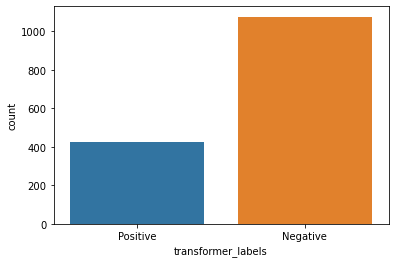

In [49]:
import seaborn as sns

sns.countplot(x='transformer_labels', data=data)

Positive Sentiments


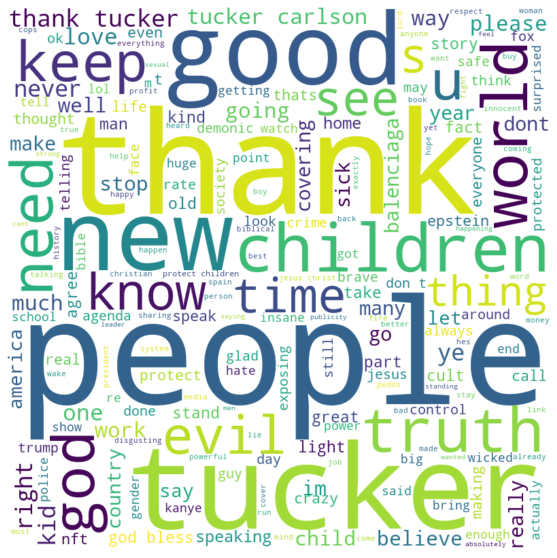

Negative Sentiments


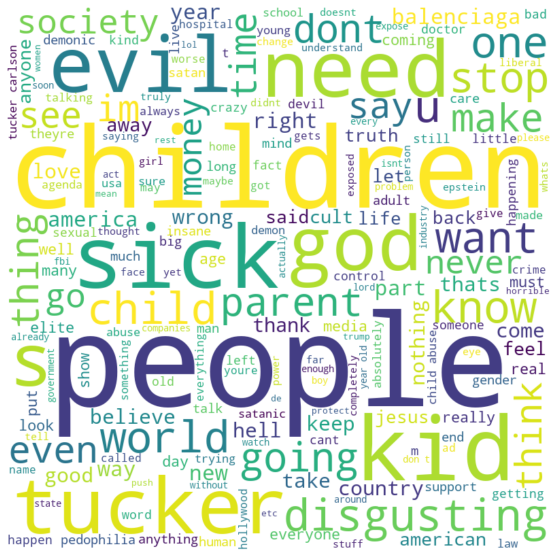

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

positive_tweets = ' '.join(data[data['transformer_labels'] == 'Positive']['Comments'].tolist())

negative_tweets = ' '.join(data[data['transformer_labels'] == 'Negative']['Comments'].tolist())

print("Positive Sentiments")
generate_wordcloud(positive_tweets)
print("Negative Sentiments")
generate_wordcloud(negative_tweets)

In [51]:
##### creating data frame of labels of the models used.

In [52]:
labels = data[['Comments','vader_labels','roberta_labels','transformer_labels']]

In [53]:
labels.head(10)

,Comments,vader_labels,roberta_labels,transformer_labels
0,god bless tucker ❤,Positive,Negative,Positive
1,whoso shall offend one little ones believe better millstone hanged neck drowned depth sea matthew 186 kjv,Negative,Positive,Negative
2,absolutely unbelievable thank tucker standing evil,Negative,Negative,Positive
3,thank covering tucker carlson elites know devil jesus real show side sadly filters society people blindly live deny god it’s disgusting gives kick bum need stop backsliden state i’m come back christ hard,Negative,Negative,Negative
4,looks like corona also affected brains quite people us evil innocent children form worst possible sin must never go unpunished,Negative,Negative,Negative
5,research sra satanic ritual abuse survivors coming forward rituals performed elites,Negative,Positive,Negative
6,demons feeling bold dont even try hide itthinking wont push back,Positive,Positive,Negative
7,isnt lying spread misinformation crime think moral crime,Negative,Negative,Negative
8,precious little girls parents already trafficked😮 needs helped,Positive,Negative,Negative
9,want rock 🌎i dont belong,Positive,Negative,Negative


In [54]:
####Checking accuracy and F1 Score of the models used.

In [55]:
from sklearn.metrics import accuracy_score, f1_score


# Get the Vader labels
y_true = data['transformer_labels']
# Get the labels from approach 1
y_pred_approach_1 = data['vader_labels']
y_pred_approach_2 = data['roberta_labels']
# Calculate the accuracy score for each approach
acc_approach_1 = accuracy_score(y_true, y_pred_approach_1)
acc_approach_2 = accuracy_score(y_true, y_pred_approach_2)
# Calculate the F1 score for each approach
f1_approach_1 = f1_score(y_true, y_pred_approach_1, average='weighted')
f1_approach_2 = f1_score(y_true, y_pred_approach_2, average='weighted')
# Print the results
 
print("Accuracy for vader_labels : {:.4f}".format(acc_approach_1))
print("F1 score for vader_labels: {:.4f}".format(f1_approach_1))
print("Accuracy for roberta_labels : {:.4f}".format(acc_approach_2))
print("F1 score for roberta_labels: {:.4f}".format(f1_approach_2))

Accuracy for vader_labels : 0.6693
F1 score for vader_labels: 0.6850
Accuracy for roberta_labels : 0.6973
F1 score for roberta_labels: 0.7026


In [56]:
####comparison of the results of the scores of models through plots

In [57]:
import matplotlib.pyplot as plt
vader_f1 = [f1_approach_1,]
roberta_f1 = [f1_approach_2]
vader_acc = [acc_approach_1]
roberta_acc = [acc_approach_2]

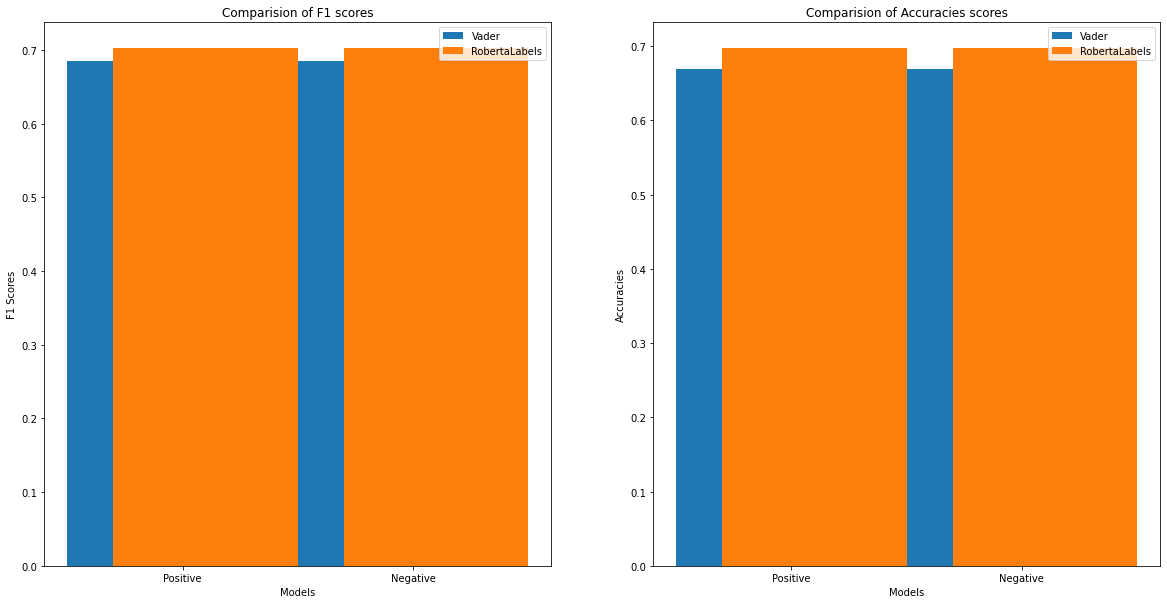

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].bar([0, 1], vader_f1, label='Vader')
axs[0].bar([0.2, 1.2], roberta_f1, label='RobertaLabels')
axs[0].set_xlabel('Models')
axs[0].set_ylabel('F1 Scores')
axs[0].set_xticks([0.1, 1.1])
axs[0].set_xticklabels(['Positive', 'Negative'])
axs[0].set_title('Comparision of F1 scores')
axs[0].legend()
# Plot accuracies in the second subplot
axs[1].bar([0, 1], vader_acc, label='Vader')
axs[1].bar([0.2, 1.2], roberta_acc, label='RobertaLabels')
axs[1].set_xlabel('Models')
axs[1].set_ylabel('Accuracies')
axs[1].set_xticks([0.1, 1.1])
axs[1].set_xticklabels(['Positive', 'Negative'])
axs[1].set_title('Comparision of Accuracies scores')
axs[1].legend()

In [59]:
###Conclusion
###Based on the F1 scores, the roberta model has the highest F1 score of 0.7026,outperforming vader model's f1 score of  0.6850, so to conclude ,roberta model predicted sentiments much accurately than vader model for a dataset of this type and size.

